# E-SIGNED ANALYSIS BY MEMBERS OF THE DATA ARCHIVES

## TABLE OF CONTENTS 

[INTRODUCTION](#INTRODUCTION)

[IMPORTING LIBRARIES](#IMPORTING-LIBRARIES)

[LOADING THE DATASETS](#LOADING-THE-DATASETS)

[ASSESSING THE DATASETS](#ASSESSING-THE-DATASETS)

[EXPLORATORY DATA ANALYSIS](#EXPLORATORY-DATA-ANALYSIS)

[PREPARATION FOR THE MODELS](#PREPARATION-FOR-THE-MODELS)

[MODELING](#THE-MODELS)

[STORING THE OUTPUT](#THE-TEST-DATA)

## INTRODUCTION

You just got hired as a Data Scientist at Borrowme, a fintech playing in the lending space. The CEO tasks you with helping to revamp the lending process due to complaints from customers on the time the process takes.

The IT team has provided historical information containing the information of applicants and the status of their loan application process. You are expected to automate the process by building a machine learning model to predict the outcome of the lending process if the credit facility process was completed via e-process, that is E-Signed or not.

Here is the link to the description of the variables in the train and test datasets https://www.kaggle.com/competitions/datafestafrica-ml-hackathon/data

## IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle
from scipy import stats
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, classification_report  
from sklearn.metrics import confusion_matrix, f1_score,matthews_corrcoef
from sklearn.metrics import precision_recall_curve, precision_recall_fscore_support
from sklearn.metrics import precision_score,recall_score,roc_curve
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

## LOADING THE DATASETS

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## ASSESSING THE DATASETS

In [4]:
train.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,...,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
0,7629673,40,bi-weekly,1,3135,0,3,3,6,2,...,550,36200,0.737398,0.903517,0.487712,0.515977,0.580918,0.380918,10,1
1,5335819,33,semi-monthly,0,3590,0,5,2,2,8,...,1100,53850,0.617361,0.857560,0.613487,0.665523,0.744634,0.744634,12,0
2,8492423,21,weekly,0,2303,0,5,8,2,7,...,600,74850,0.677109,0.758765,0.495609,0.664762,0.592556,0.492556,6,1
3,7948313,26,bi-weekly,0,2795,0,4,4,1,6,...,800,50800,0.738055,0.873204,0.666437,0.700392,0.584130,0.684130,14,1
4,4297036,43,bi-weekly,0,5000,0,2,1,1,2,...,1100,69100,0.798303,0.841747,0.401971,0.568787,0.525905,0.725905,5,1


In [5]:
test.head()

,Entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,3560428,61,weekly,0,3180,0,6,3,2,7,1,600,30150,0.738510,0.881027,0.713423,0.826402,0.730720,0.630720,9
1,6934997,23,weekly,0,1540,6,0,0,7,1,1,450,34550,0.642993,0.766554,0.595018,0.762284,0.531712,0.531712,7
2,5682812,40,bi-weekly,0,5230,0,6,1,2,7,1,700,42150,0.665224,0.960832,0.767828,0.778831,0.792552,0.592552,8
3,6493191,32,semi-monthly,0,5260,3,0,3,1,4,1,1150,64050,0.652429,0.802433,0.593816,0.560389,0.569459,0.369459,3
4,8990111,61,bi-weekly,1,3270,0,4,0,4,3,1,400,61700,0.659736,0.937287,0.852323,0.785698,0.632466,0.732466,7


In [6]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entry_id              12516 non-null  int64  
 1   age                   12516 non-null  int64  
 2   pay_schedule          12516 non-null  object 
 3   home_owner            12516 non-null  int64  
 4   income                12516 non-null  int64  
 5   months_employed       12516 non-null  int64  
 6   years_employed        12516 non-null  int64  
 7   current_address_year  12516 non-null  int64  
 8   personal_account_m    12516 non-null  int64  
 9   personal_account_y    12516 non-null  int64  
 10  has_debt              12516 non-null  int64  
 11  amount_requested      12516 non-null  int64  
 12  risk_score            12516 non-null  int64  
 13  risk_score_2          12516 non-null  float64
 14  risk_score_3          12516 non-null  float64
 15  risk_score_4       

For the train dataframe, there are 21 columns and 12516 entries(rows) while the test dataframe contains 20 columns and 5391 entries(rows) 

The test dataframe does not contain the 'e_signed' column because, the purpose of this project is to predict that. 

There isn't any null-cell in the both the train dataframe and the test dataframe. 

In [7]:
print(train.describe())
print(test.describe())

           Entry_id           age    home_owner        income  \
count  1.251600e+04  12516.000000  12516.000000  12516.000000   
mean   5.599485e+06     43.026766      0.425056   3654.110658   
std    2.563354e+06     11.865891      0.494371   1508.072163   
min    1.111398e+06     18.000000      0.000000    905.000000   
25%    3.376885e+06     34.000000      0.000000   2575.000000   
50%    5.608376e+06     42.000000      0.000000   3255.000000   
75%    7.803325e+06     51.000000      1.000000   4661.250000   
max    9.999874e+06     96.000000      1.000000   9985.000000   

       months_employed  years_employed  current_address_year  \
count     12516.000000    12516.000000          12516.000000   
mean          1.191355        3.532998              3.593161   
std           2.404529        2.265293              2.749211   
min           0.000000        0.000000              0.000000   
25%           0.000000        2.000000              2.000000   
50%           0.000000        

In [8]:
# check for duplicates in the 2 datsets 

print(train.duplicated(keep=False).sum())
print(test.duplicated(keep=False).sum())

0
0


There isn't any duplicate in both the train and the test dataframes

## EXPLORATORY DATA ANALYSIS

**First, lets see the distribution of the 'age'variable**

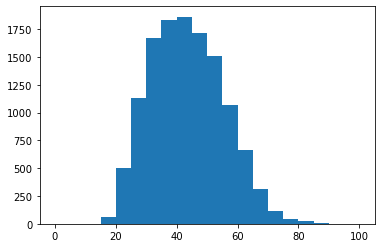

In [9]:
# lets see the distribution of the age variable 

bins = np.arange(0, train['age'].max()+5, 5)
plt.hist(data = train, x = 'age', bins = bins);

The age variable is normally distributed

Next, I want to see the relationship between the 'age' variable and the 'e_signed' variable

In [11]:
ranges = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99']
train['age_bin'] = pd.cut(train['age'], [18, 29, 39, 49, 59, 69, 79, 89, 99], labels=ranges)

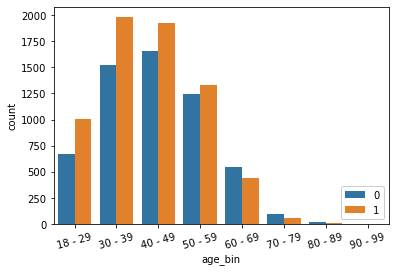

In [12]:
sedan_classes = ['18 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 - 89', '90 - 99']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
 ageclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
 train['age_bin'] = train['age_bin'].astype(ageclasses)
else: # pre-v0.21
    train['age_bin'] = train['age_bin'].astype('category', ordered = True,categories = sedan_classes)

  # plotting
ax = sns.countplot(data = train, x = 'age_bin', hue = 'e_signed')
ax.legend(loc = 4, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 15);

From the chart above, we can see that in most of the age groups, more indivuals completed the process via e-signing except for ages from 60 and above. 

Now, its time to look into the **pay schedule**

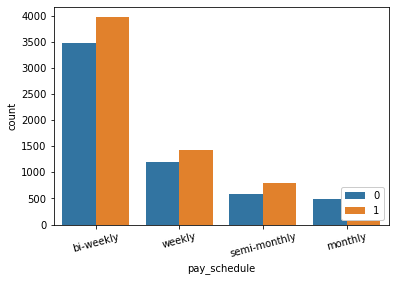

In [13]:
sedan_classes = ['bi-weekly', 'weekly', 'semi-monthly', 'monthly']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
 payclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
 train['pay_schedule'] = train['pay_schedule'].astype(payclasses)
else: # pre-v0.21
    train['pay_schedule'] = train['pay_schedule'].astype('category', ordered = True,categories = sedan_classes)

  # plotting
ax = sns.countplot(data = train, x = 'pay_schedule', hue = 'e_signed')
ax.legend(loc = 4, framealpha = 1) # lower right, no transparency
plt.xticks(rotation = 15);

**Next, lets look into the 'home_owner' variable.** 

*Is there a relationship between an individual being a home owner and the probability of him completing the process via e-process ?*

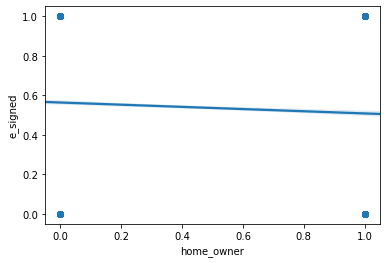

In [14]:
# I'd be using scatter plot for this 

sns.regplot(data = train, x = 'home_owner', y = 'e_signed', truncate=False);

I'd use hist2d to view it properly 

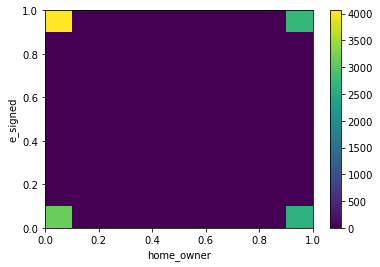

In [15]:
plt.hist2d(data = train, x = 'home_owner', y = 'e_signed')
plt.colorbar()
plt.xlabel('home_owner')
plt.ylabel('e_signed');

From the chart above, we can see that most of the individuals that are not home owners complete the process via e-process.

**Now, lets look into the income variable**

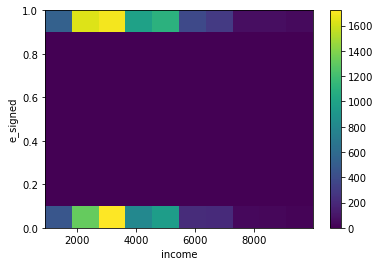

In [16]:
# lets see the relationship between the income and e_signed 

plt.hist2d(data = train, x = 'income', y = 'e_signed')
plt.colorbar()
plt.xlabel('income')
plt.ylabel('e_signed');

Although the difference isn't too much, there are more indivuals with income between '2000 and 4000' using the e process. 

Now, I want to look at the distribution of the income variable 

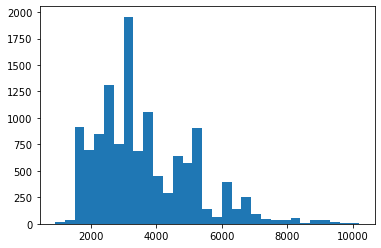

In [17]:
# lets see the distribution of the income variable 

bins = np.arange(905, train['income'].max()+300, 300)
plt.hist(data = train, x = 'income', bins = bins);

It is skewed to the right. Ill apply a logarithmic transformation to it and then view the output 

In [18]:
train['log_income'] = np.log(train['income'])

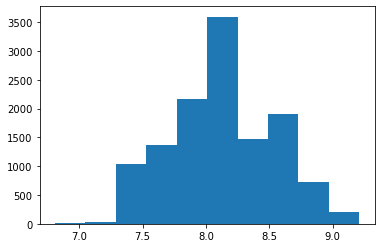

In [19]:
plt.hist(data = train, x = 'log_income');

Looks much better, I'll be using the log of the income for the model. 

Next, I'll create another column for the average of the risk scores which would also be used for the model

In [20]:
train['avg_risk_score'] = ((train['risk_score'] + train['risk_score_2'] + train['risk_score_3'] + train['risk_score_4'] + train['risk_score_5'])/5)

For the amount requested variable, I will be using the log for the model.

So now, to create a column for the log 

In [26]:
train['log_amount_requested'] = np.log(train['amount_requested'])

**Now, lets look at the inquries_last_month variable**

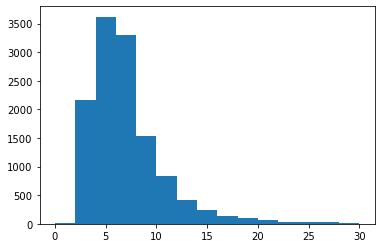

In [27]:
# the distribution

# first, we'll look at its distribution

bins = np.arange(0, train['inquiries_last_month'].max()+2, 2)
plt.hist(data = train, x = 'inquiries_last_month', bins = bins);

It is skewed to the left. Let's take a look at the log of this variable 

In [28]:
train['log_inquiries_last_month'] = np.log(train['inquiries_last_month'])

In [46]:
train['personal_account_months'] = (train['personal_account_y']*12) + train['personal_account_m']

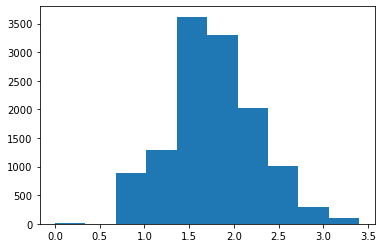

In [29]:
plt.hist(data = train, x = 'log_inquiries_last_month');

The log of the inquiries_last_month variable would be used for the model

**Now, I want to see the general relationship between all the variables and the e_signed variable**

I'd be using heatmap to view the relationship

Using the train dataframe just the way it is would not be efficient as the variables are too much, so I'd be breaking the dataframe into 3 different dataframes and viewing them individually. 

In [30]:
train.columns

Index(['Entry_id', 'age', 'pay_schedule', 'home_owner', 'income',
       'months_employed', 'years_employed', 'current_address_year',
       'personal_account_m', 'personal_account_y', 'has_debt',
       'amount_requested', 'risk_score', 'risk_score_2', 'risk_score_3',
       'risk_score_4', 'risk_score_5', 'ext_quality_score',
       'ext_quality_score_2', 'inquiries_last_month', 'e_signed', 'age_bin',
       'log_income', 'avg_risk_score', 'log_amount_requested',
       'log_inquiries_last_month'],
      dtype='object')

In [39]:
heat1 = train.copy()
heat2 = train.copy()
heat3 = train.copy()

In [40]:
heat1.drop(['avg_risk_score', 'log_amount_requested', 'age', 'pay_schedule', 'years_employed', 'months_employed',
             'log_income', 'Entry_id', 'home_owner', 'income', 'current_address_year',
             'personal_account_m', 'personal_account_y', 'has_debt', 'amount_requested',
             'inquiries_last_month', 'age_bin'], axis = 1, inplace = True)

heat2.drop(['log_inquiries_last_month', 'years_employed', 'current_address_year', 'income', 
             'has_debt', 'Entry_id',  'risk_score', 'risk_score_2', 'risk_score_3',
             'risk_score_4', 'risk_score_5', 'home_owner', 'amount_requested', 'ext_quality_score',
             'ext_quality_score_2', 'log_income', 'avg_risk_score', 'log_amount_requested'], axis = 1, inplace = True)

heat3.drop(['log_inquiries_last_month', 'inquiries_last_month', 'risk_score', 'risk_score_2',
             'risk_score_3', 'risk_score_4', 'risk_score_5', 'personal_account_y', 
             'personal_account_m', 'Entry_id', 'months_employed', 'ext_quality_score',
             'ext_quality_score_2', 'age_bin'], axis = 1, inplace = True)

In [41]:
heat1_matrix = heat1.corr()
heat2_matrix = heat2.corr()
heat3_matrix = heat3.corr()

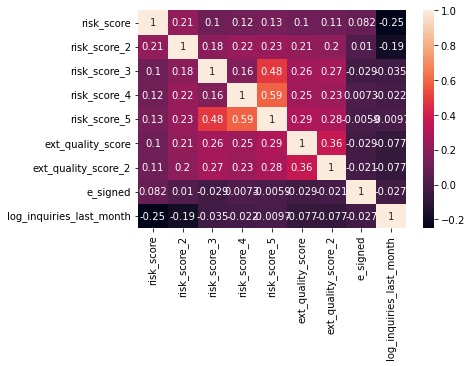

In [42]:
sns.heatmap(heat1_matrix, annot = True)

plt.show()

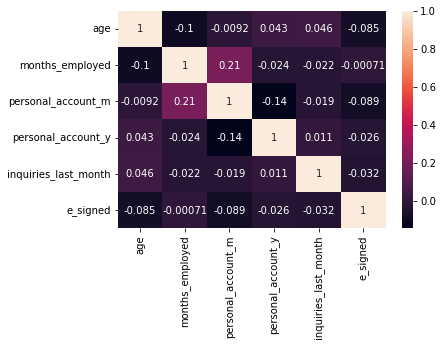

In [43]:
sns.heatmap(heat2_matrix, annot = True)

plt.show()

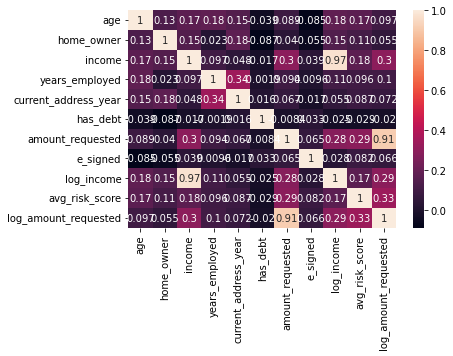

In [44]:
sns.heatmap(heat3_matrix, annot = True)

plt.show()

Lastly, Ill make break down the pay_schedule column to be able to use it for the model 

In [45]:
train = pd.get_dummies(train, columns = ['pay_schedule'])

## THE MODELS

**INPUT FEATURES**

In [47]:
feature_names = ['age', 'log_income', 'home_owner', 'log_amount_requested', 'personal_account_months',
                'log_inquiries_last_month', 'has_debt','avg_risk_score','months_employed', 'years_employed','current_address_year',
                'personal_account_m','personal_account_y','amount_requested',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5','ext_quality_score', 
                 'ext_quality_score_2', 'inquiries_last_month']

**OUTPUT FEATURES**

In [48]:
target_name = ['e_signed']

**ASSIGNING INPUT AND OUTPUT**

In [50]:
X = train[feature_names]

Y = train[target_name]

**BUILD CLASSIFICATION MODEL USING RANDOM FOREST**

In [51]:
clf = RandomForestClassifier()

In [52]:
clf.fit(X, Y)

C:\Users\User\AppData\Local\Temp\ipykernel_3608\638930132.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, Y)


RandomForestClassifier()

In [53]:
print(clf.feature_importances_)

[0.06059163 0.0762066  0.00920011 0.05160606 0.05604564 0.03161881
 0.00883857 0.08067957 0.01831478 0.0336576  0.03635695 0.03240731
 0.0266565  0.05263038 0.06682128 0.06677067 0.06568097 0.06377632
 0.06409706 0.06500667 0.03303649]


**MAKE PREDICTION**

**SPLIT THE DATA INTO 80/20**

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

**REBUILD THE RANDOM FOREST MODEL**

In [55]:
clf.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Temp\ipykernel_3608\3383944391.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


RandomForestClassifier()

**PREDICT ON THE TEST SET**

In [57]:
print(clf.predict(X_test))

[1 0 0 ... 1 1 0]


**MODEL PERFORMANCE**

In [58]:
print(clf.score(X_test, Y_test))

0.6265974440894568


## THE TEST DATA

In [59]:
test['log_income'] = np.log(test['income'])
test['log_amount_requested'] = np.log(test['amount_requested'])

In [60]:
test['log_inquiries_last_month'] = np.log(test['inquiries_last_month'])

In [61]:
test['personal_account_months'] = (test['personal_account_y']*12) + test['personal_account_m']

In [62]:
test['avg_risk_score'] = ((test['risk_score'] + test['risk_score_2'] + test['risk_score_3'] + test['risk_score_4'] + test['risk_score_5'])/5)

In [63]:
test['avg_ext_quality'] = ((test['ext_quality_score'] + test['ext_quality_score_2'])/2)

In [64]:
feature_names_test = ['age', 'log_income', 'home_owner', 'log_amount_requested', 'personal_account_months',
                'log_inquiries_last_month', 'has_debt','avg_risk_score','months_employed', 'years_employed','current_address_year',
                'personal_account_m','personal_account_y','amount_requested',
       'risk_score_2', 'risk_score_3', 'risk_score_4', 'risk_score_5','ext_quality_score', 
                 'ext_quality_score_2', 'inquiries_last_month']

In [65]:
X_newtest = test[feature_names_test]

In [66]:
answer = clf.predict(X_newtest)

In [67]:
df_answer = pd.DataFrame(answer, columns = ['Y_test'])

In [68]:
df_answer.to_csv('Data_archive3.csv',index=False)